In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = '/content/drive/MyDrive/Colab Notebooks/cityclmid.csv'
data = pd.read_csv(df, sep=',')
data

,Unnamed: 0,tm,totalCityName,doName,cityName,cityAreaId,kmaTci,TCI_GRADE
0,0,2022-07-03 0:00,제주 서귀포시,제주,서귀포시,5013000000,-0.61,나쁨
1,1,2022-07-03 0:00,경기 평택시,경기,평택시,4122000000,-0.23,보통
2,2,2022-07-03 0:00,경기 광명시,경기,광명시,4121000000,-0.46,나쁨
3,3,2022-07-03 0:00,경기 부천시,경기,부천시,4119500000,-0.28,나쁨
4,4,2022-07-03 0:00,경기 안양시,경기,안양시,4117100000,-0.27,나쁨
...,...,...,...,...,...,...,...,...
49995,49995,2021-12-04 0:00,강원 인제군,강원,인제군,4281000000,-0.12,보통
49996,49996,2021-12-04 0:00,강원 양구군,강원,양구군,4280000000,-0.12,보통
49997,49997,2021-12-04 0:00,강원 화천군,강원,화천군,4279000000,-0.12,보통
49998,49998,2021-12-04 0:00,강원 철원군,강원,철원군,4278000000,-0.12,보통


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50000 non-null  int64  
 1   tm             50000 non-null  object 
 2   totalCityName  50000 non-null  object 
 3   doName         50000 non-null  object 
 4   cityName       50000 non-null  object 
 5   cityAreaId     50000 non-null  int64  
 6   kmaTci         50000 non-null  float64
 7   TCI_GRADE      50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [ ]:
columns = list(data.columns)

In [ ]:
def getCatCol(data):
  cat_columns = []
  for col in data.columns:
    if data[col].dtype == 'object':
      cat_columns.append(col)
  return cat_columns

In [ ]:
cat_columns = getCatCol(data)

In [ ]:
num_columns = [x for x in columns if x not in cat_columns]

In [ ]:
print(columns)
print(cat_columns)
print(num_columns)

['Unnamed: 0', 'tm', 'totalCityName', 'doName', 'cityName', 'cityAreaId', 'kmaTci', 'TCI_GRADE']
['tm', 'totalCityName', 'doName', 'cityName', 'TCI_GRADE']
['Unnamed: 0', 'cityAreaId', 'kmaTci']


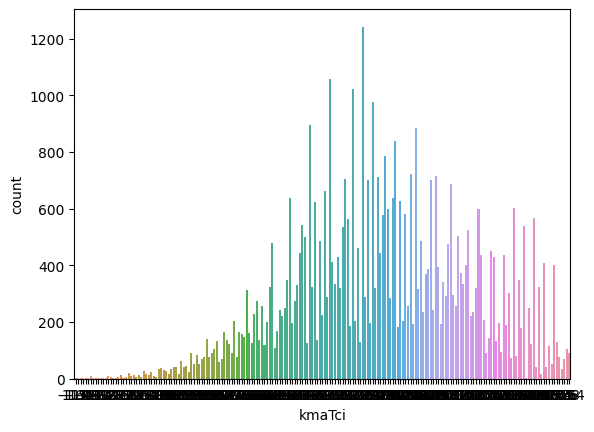

In [ ]:
sns.countplot(data = data, x = "kmaTci")
plt.show()

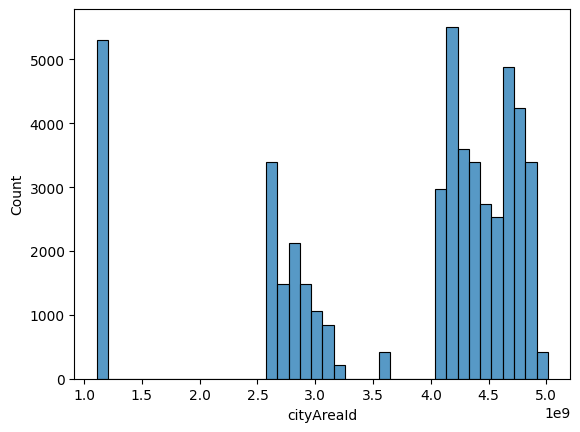

In [ ]:
sns.histplot(data = data, x = "cityAreaId")
plt.show()

In [ ]:
data["cityAreaId"].value_counts()

5013000000    212
4681000000    212
4711100000    212
4691000000    212
4690000000    212
             ... 
4423000000    211
4421000000    211
4275000000    211
4276000000    211
4518000000    211
Name: cityAreaId, Length: 236, dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,cityAreaId,kmaTci
count,50000.000000,5.000000e+04,50000.000000
mean,24999.500000,3.771179e+09,-0.158195
std,14433.901067,1.153521e+09,0.353356
min,0.000000,1.111000e+09,-1.620000
25%,12499.750000,2.871000e+09,-0.410000
50%,24999.500000,4.272000e+09,-0.160000
75%,37499.250000,4.672000e+09,0.110000
max,49999.000000,5.013000e+09,0.640000


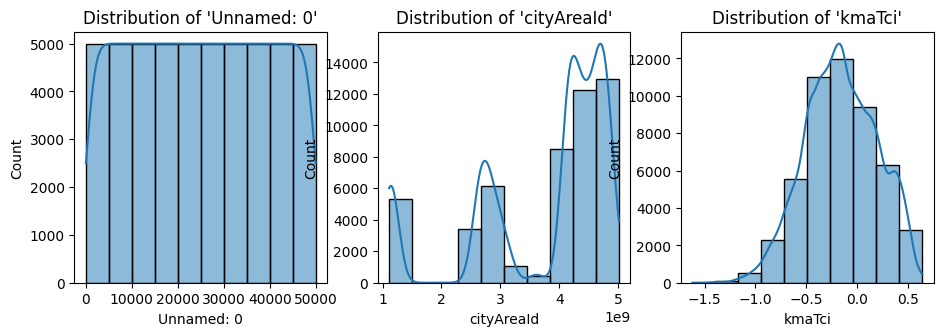

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  plt.subplot(4, 4, i+1)
  sns.histplot(data = data, x = num_columns[i],
      bins = 10,
      kde = True,
      ).set(title = f"Distribution of '{num_columns[i]}'");

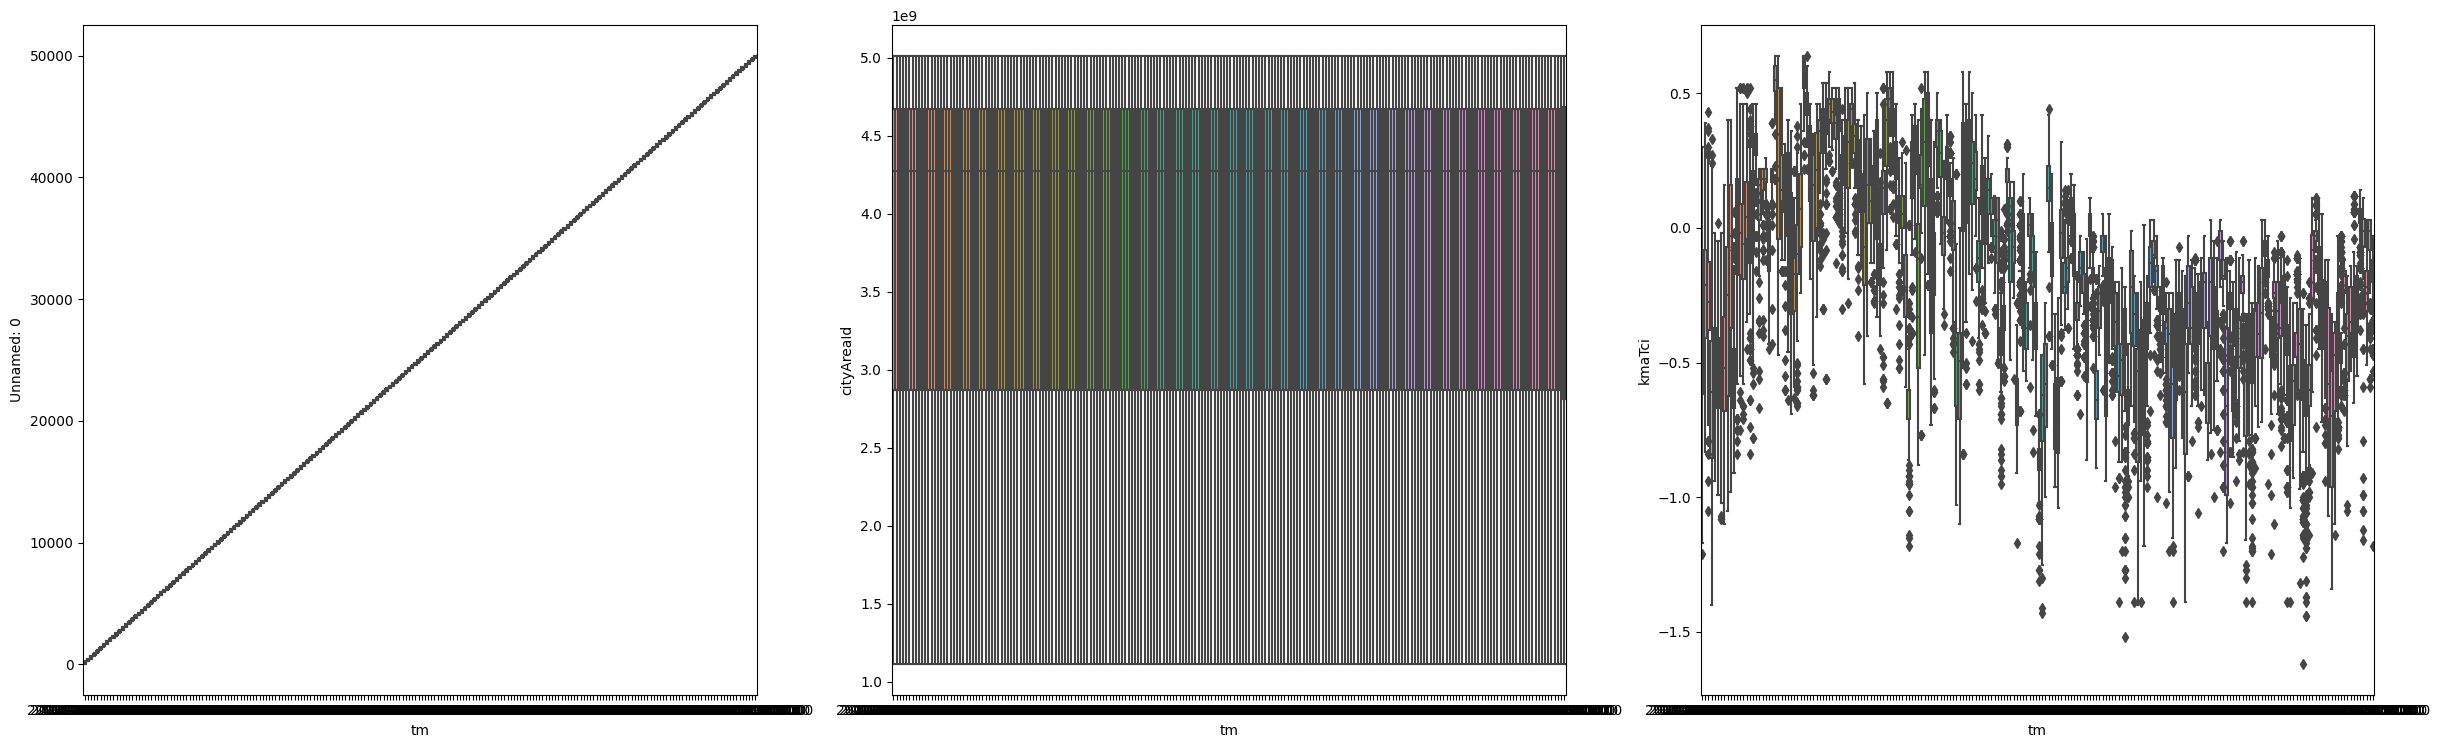

In [ ]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "tm", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*ar

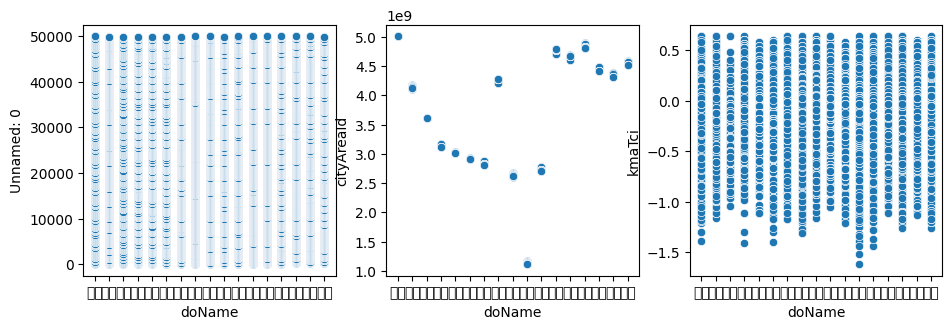

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "doName", y = num_columns[i])

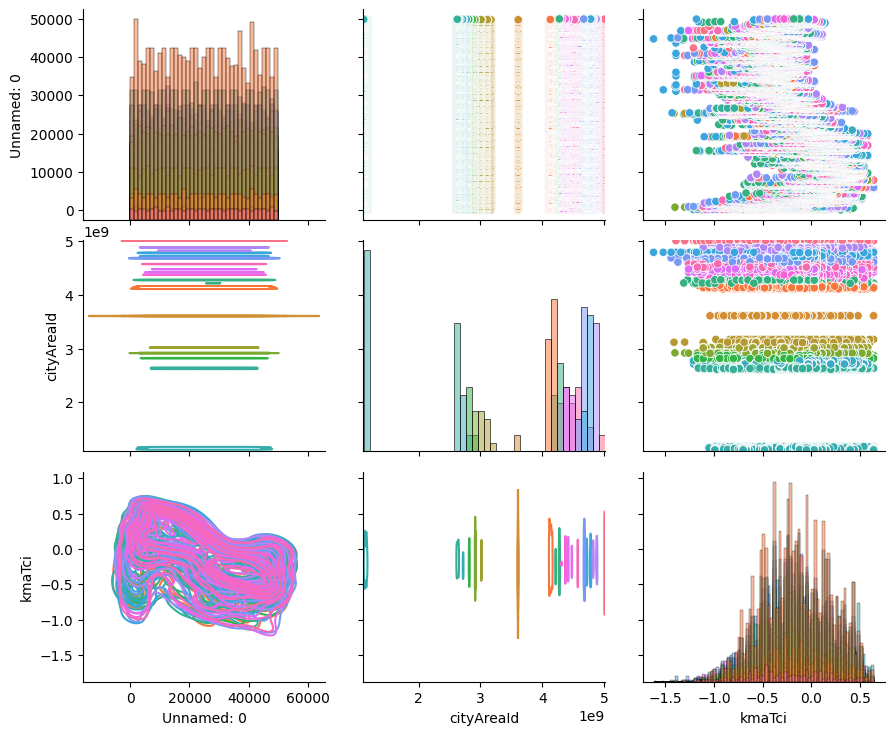

In [ ]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "doName")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

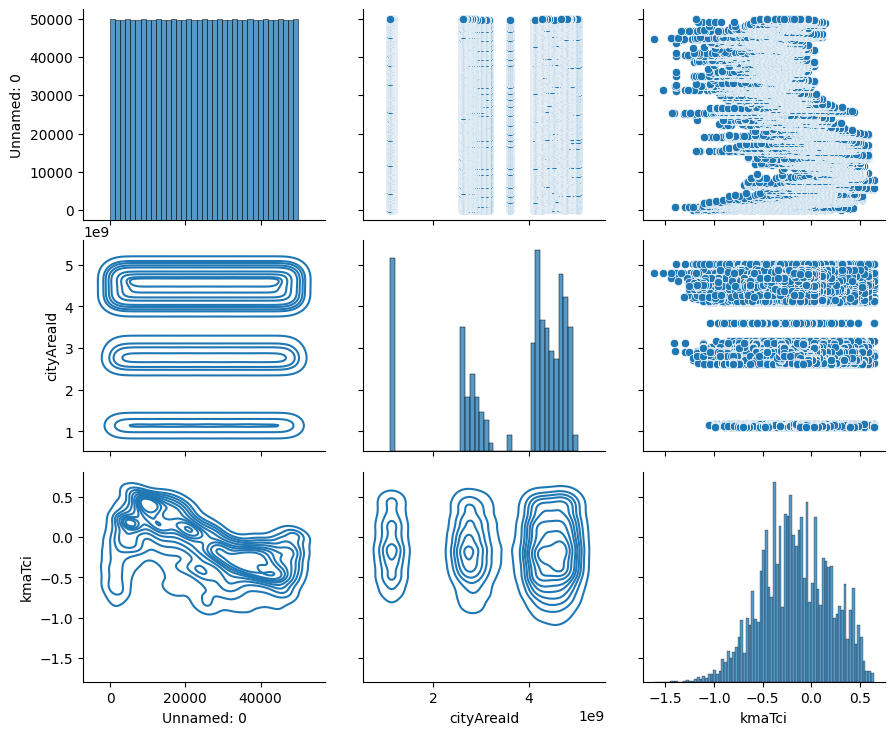

In [ ]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2)
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

In [ ]:
corr_mat = np.round(data[num_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

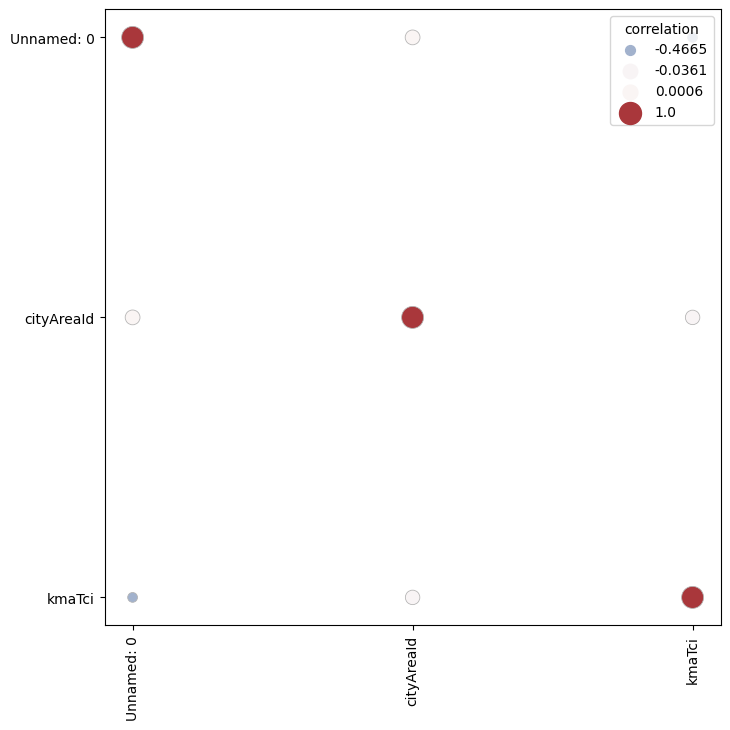

In [ ]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

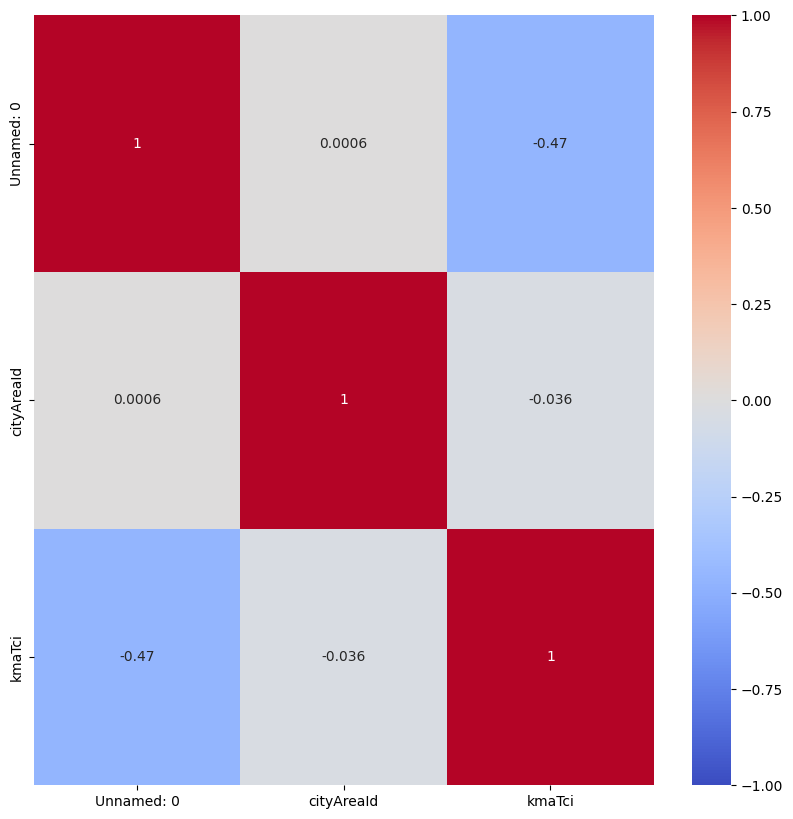

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

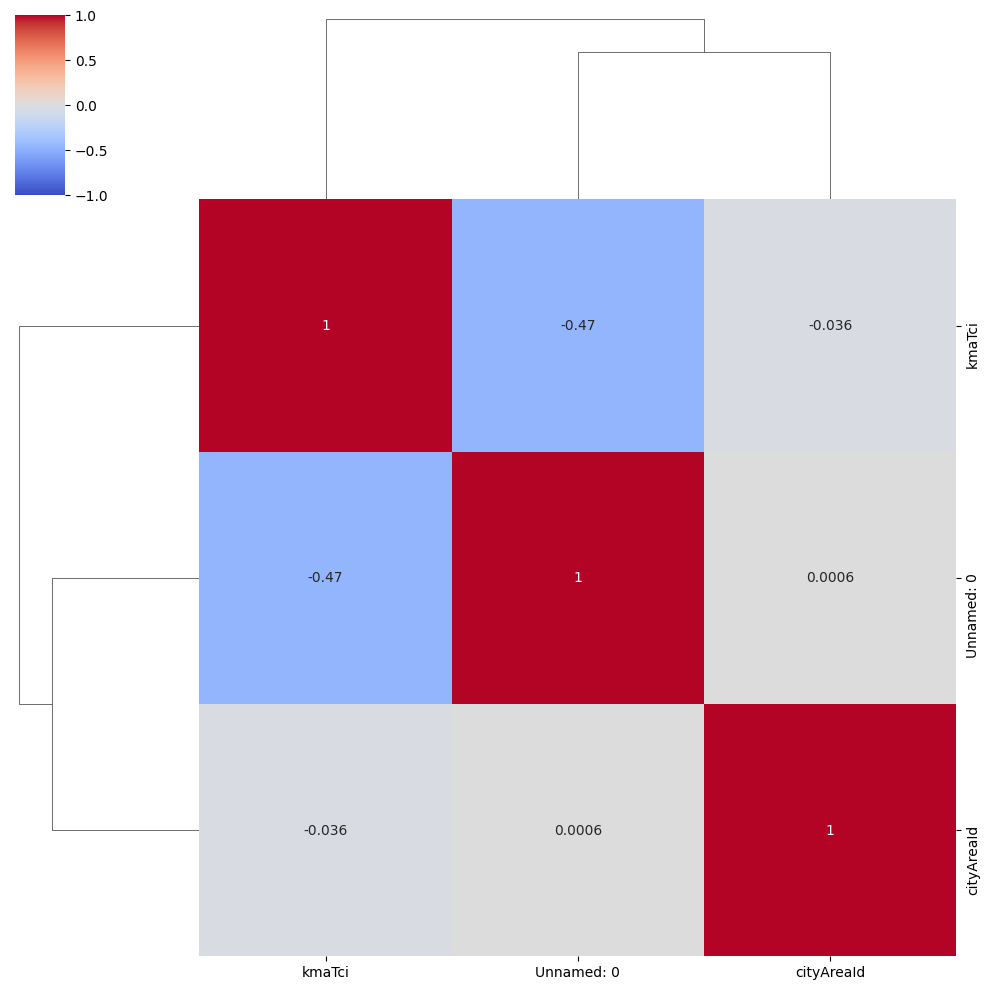

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

In [ ]:
data.describe(include="object")

,tm,totalCityName,doName,cityName,TCI_GRADE
count,50000,50000,50000,50000,50000
unique,212,229,17,206,4
top,2022-07-03 0:00,충북 청주시,경기,중구,나쁨
freq,236,848,6996,1272,20010


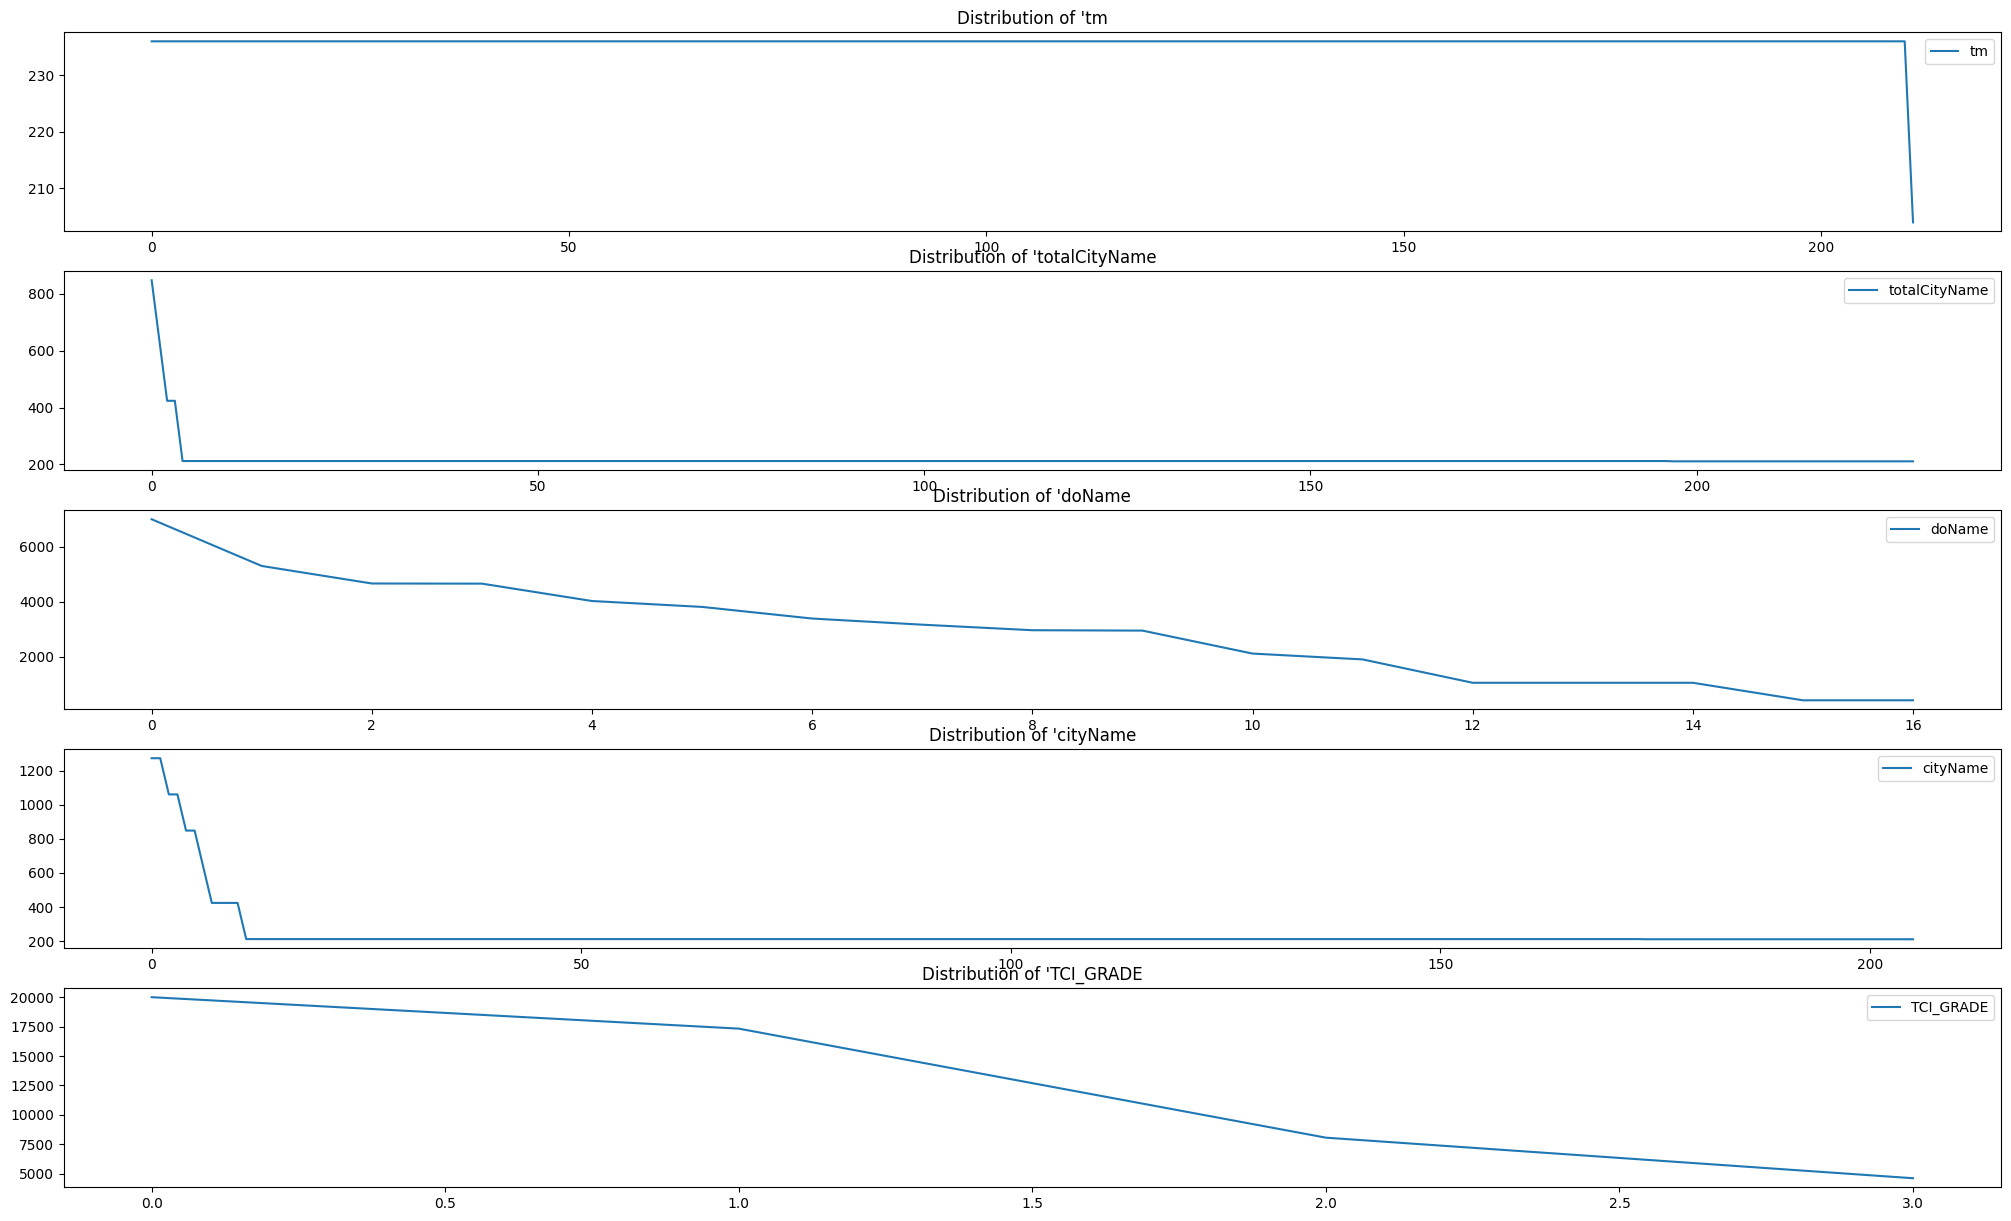

In [ ]:
plt.figure(figsize = (25, 15))
for i in range(len(cat_columns)):
  plt.subplot(5, 1, i+1)
  sns.lineplot(data = pd.DataFrame(data[f"{cat_columns[i]}"].value_counts()).reset_index()).set(title = f"Distribution of '{cat_columns[i]}");

ValueError: Could not interpret input 'count'

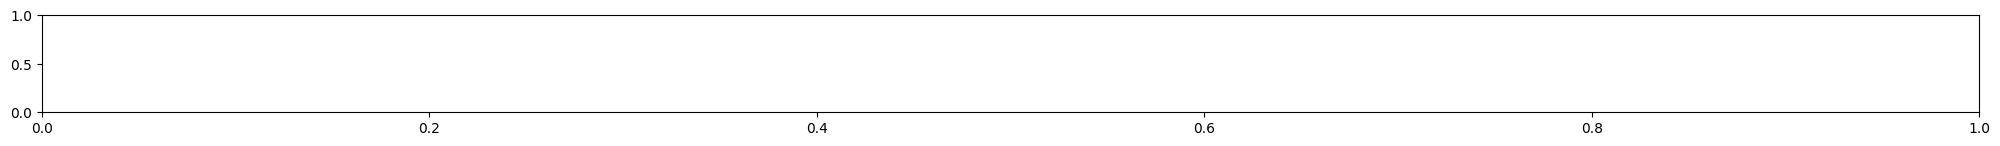

In [ ]:
plt.figure(figsize = (25, 30))

for i in range(len(cat_columns)):
  plt.subplot(20, 1, i+1)
  sns.barplot(data = pd.DataFrame(data[f"{cat_columns[i]}"].value_counts()).reset_index().head(20), x = f"{cat_columns[i]}", y="count")
  # y = "count" 라는 요소가 뭘 의미하는지 모르겠음. count를 찾지 못해서 실행불가

<ipython-input-47-a4b2494464b9>:10: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout()
<ipython-input-47-a4b2494464b9>:10: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-47-a4b2494464b9>:10: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
<ipython-input-47-a4b2494464b9>:10: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWa

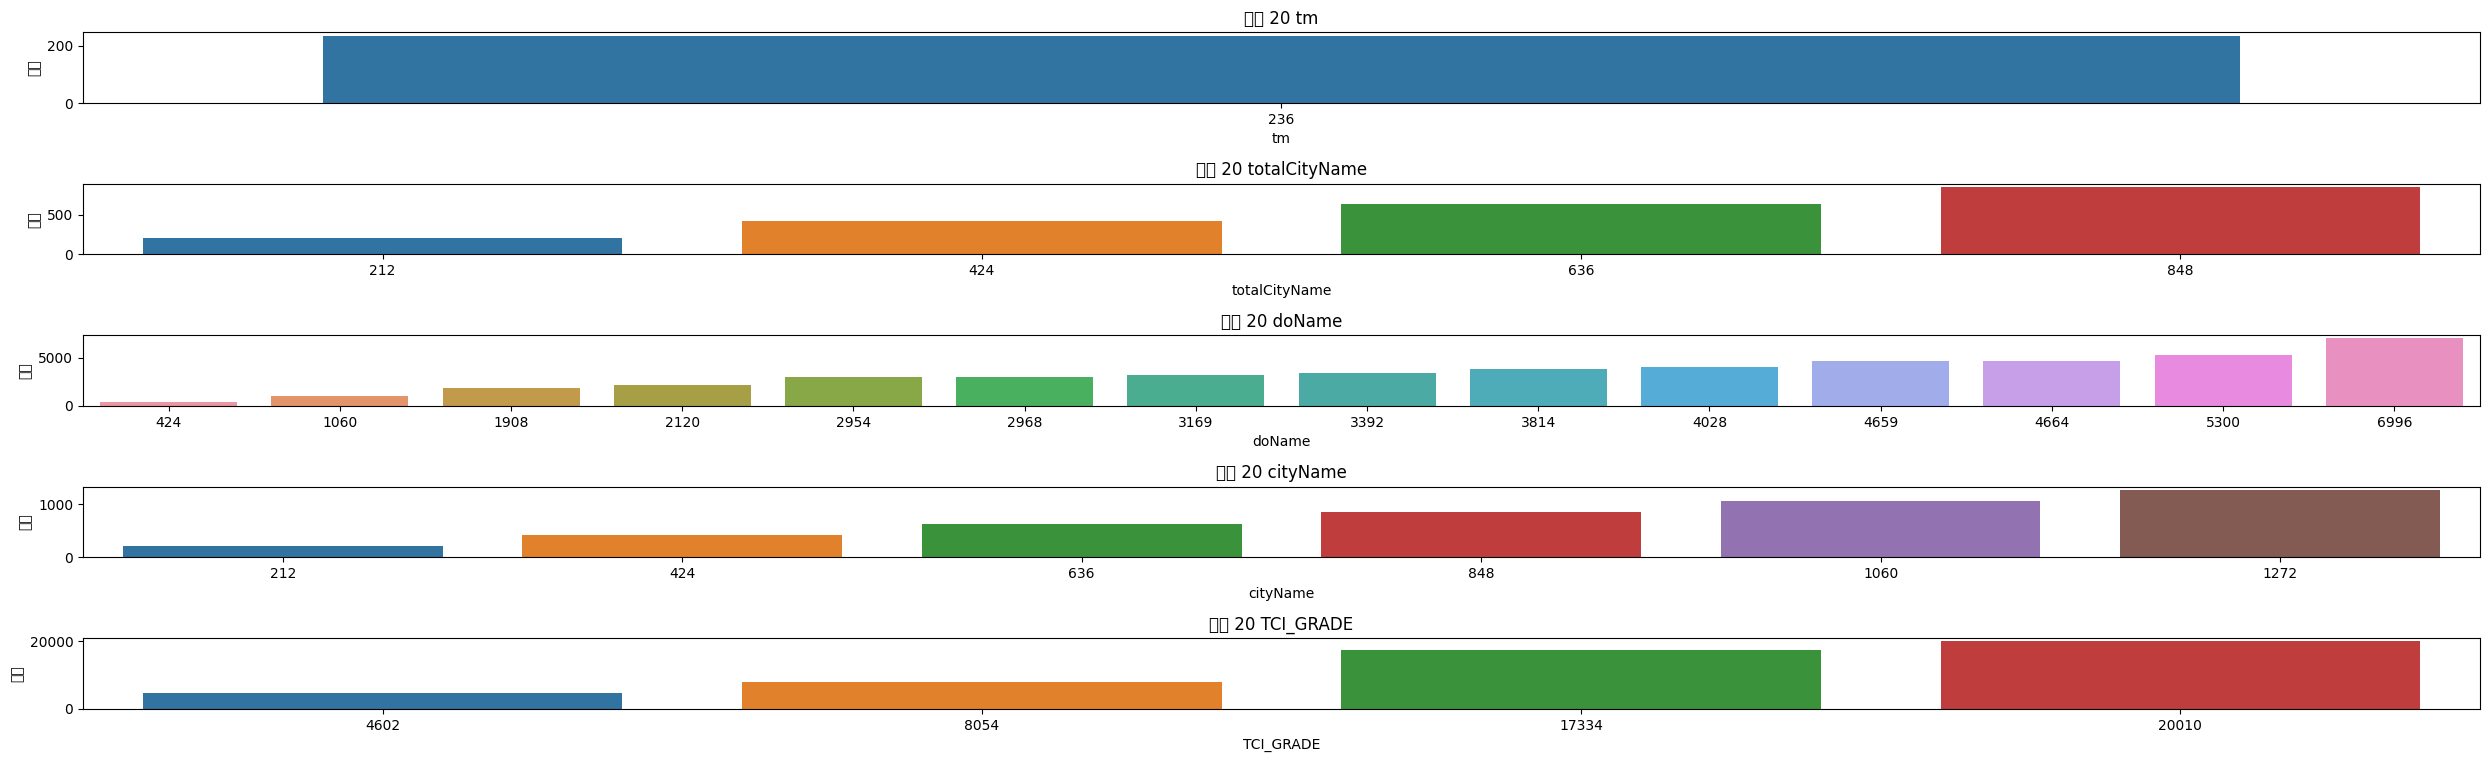

In [ ]:
plt.figure(figsize=(25, 30))

for i in range(len(cat_columns)):
    plt.subplot(20, 1, i + 1)
    value_counts_df = data[f"{cat_columns[i]}"].value_counts().reset_index().head(20)
    sns.barplot(data=value_counts_df, x=f"{cat_columns[i]}", y=value_counts_df[value_counts_df.columns[1]].astype(int))
    plt.ylabel("개수")  # y축에 레이블 추가
    plt.title(f"상위 20 {cat_columns[i]}")  # 각 subplot에 제목 추가

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize = (25, 30))
tmp = pd.DataFrame()

for i in cat_columns:
    tmp[f"{i}"] = pd.DataFrame(data[f"{i}"].value_counts().reset_index().head(20))[f"{i}"]
    tmp[f"{i}_count"] = pd.DataFrame(data[f"{i}"].value_counts().reset_index().head(20))["count"]
tmp

KeyError: 'count'

<Figure size 2500x3000 with 0 Axes>

In [ ]:
plt.figure(figsize=(25, 30))
tmp = pd.DataFrame()

for i in cat_columns:
    value_counts_df = data[f"{i}"].value_counts().reset_index().head(20)
    tmp[f"{i}"] = value_counts_df["index"]  # 'count' 대신 'index'를 사용합니다.
    tmp[f"{i}_count"] = value_counts_df[f"{i}"]
tmp

,tm,tm_count,totalCityName,totalCityName_count,doName,doName_count,cityName,cityName_count,TCI_GRADE,TCI_GRADE_count
0,2022-07-03 0:00,236,충북 청주시,848,경기,6996.0,중구,1272,나쁨,20010.0
1,2022-02-20 0:00,236,경기 성남시,636,서울,5300.0,동구,1272,보통,17334.0
2,2022-02-18 0:00,236,세종 세종시,424,경북,4664.0,서구,1060,좋음,8054.0
3,2022-02-17 0:00,236,경남 창원시,424,전남,4659.0,남구,1060,매우좋음,4602.0
4,2022-02-16 0:00,236,제주 서귀포시,212,경남,4028.0,청주시,848,NaN,NaN
5,2022-02-15 0:00,236,전남 영암군,212,강원,3814.0,북구,848,NaN,NaN
6,2022-02-14 0:00,236,경북 경주시,212,부산,3392.0,성남시,636,NaN,NaN
7,2022-02-13 0:00,236,경북 포항시,212,충남,3169.0,창원시,424,NaN,NaN
8,2022-02-12 0:00,236,전남 신안군,212,충북,2968.0,강서구,424,NaN,NaN
9,2022-02-11 0:00,236,전남 진도군,212,전북,2954.0,세종시,424,NaN,NaN


<Figure size 2500x3000 with 0 Axes>

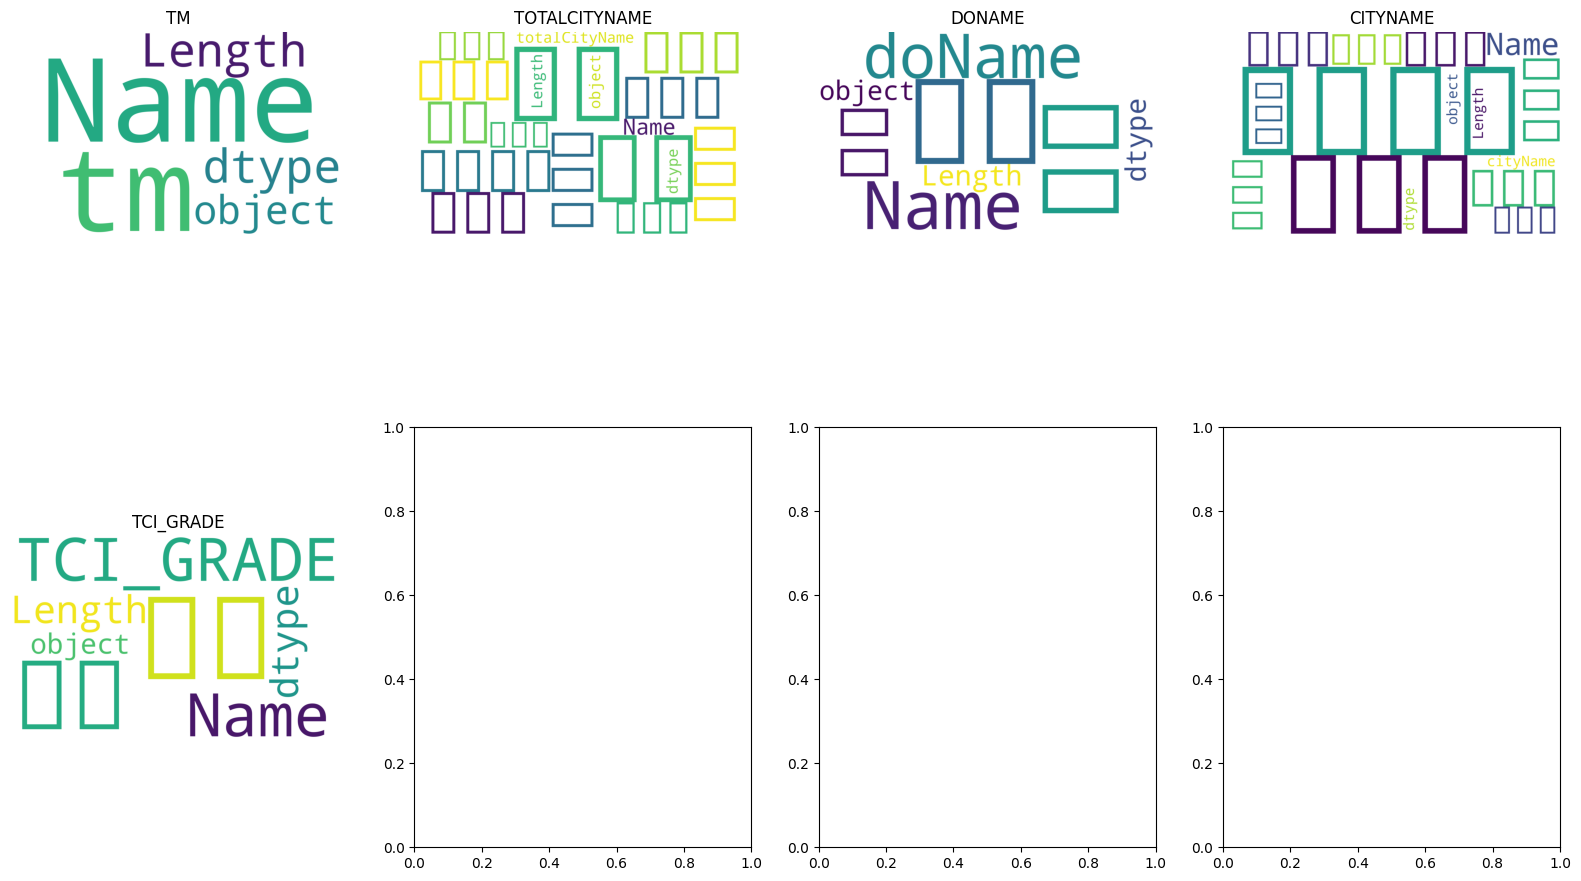

In [ ]:
wc = WordCloud(height=1200, width=2000, random_state=101, background_color='white')
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(cat_columns):
    op = wc.generate(str(data[c]))
    x = axes[i].imshow(op)
    x = axes[i].set_title(c.upper())
    x = axes[i].axis('off')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    label = LabelEncoder()
    label = label.fit(data[col])
    data[col] = label.transform(data[col])

In [ ]:
corr_mat = np.round(data[columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

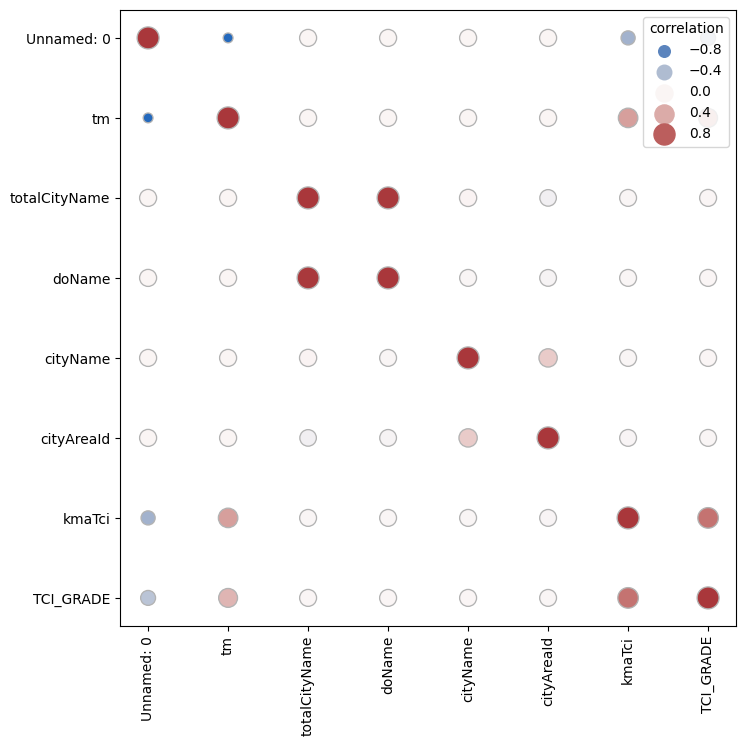

In [ ]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
    label.set_rotation(90)

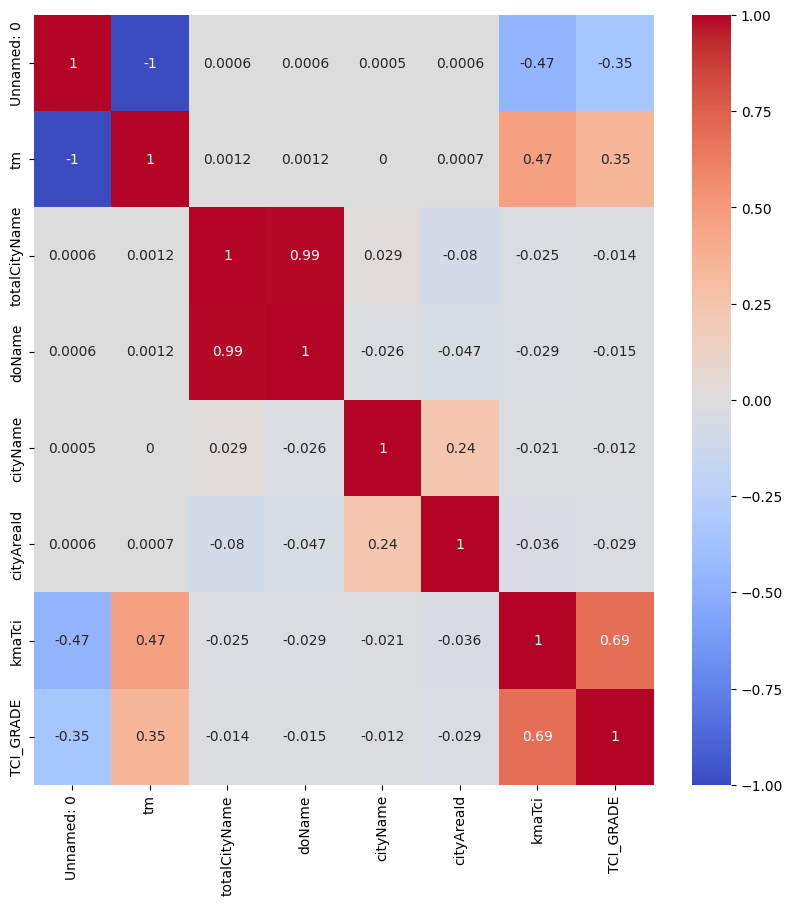

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

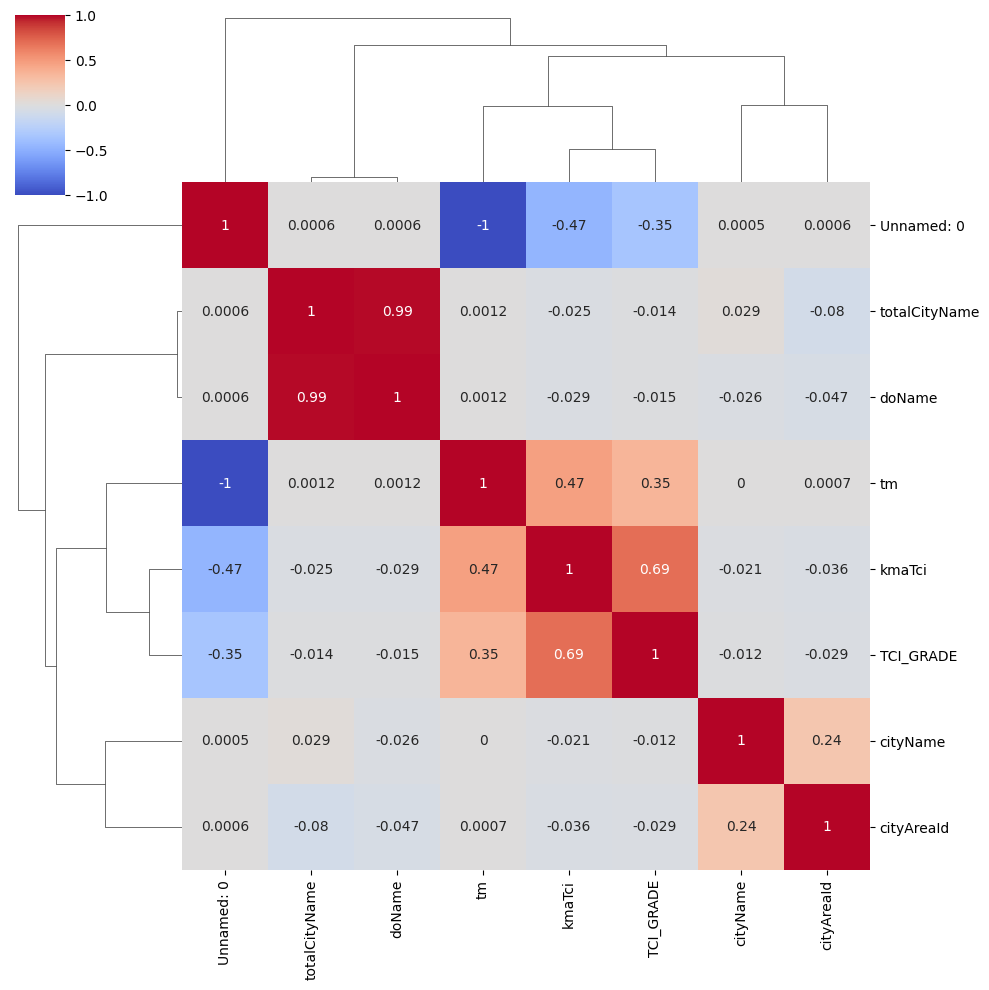

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin=-1, vmax=1, annot=True, cmap="coolwarm")

In [ ]:
corr_mat = np.round(data[columns].corr(), 3)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")